In [1]:
import pandas as pd

# Load the CSV file
csv_file_path = '../docs/HMDACensus.xlsx'
census_data = pd.read_excel(csv_file_path)
print(census_data.head())


   state_code  county_code  census_tract_number  as_of_year  loanN  \
0           1            1                201.0        2017     30   
1           1            1                202.0        2017     34   
2           1            1                203.0        2017     78   
3           1            1                204.0        2017    100   
4           1            1                206.0        2017     83   

   population       GEOID   INTPTLAT   INTPTLON  
0        1948  1001020100  32.481973 -86.491565  
1        2156  1001020200  32.475758 -86.472468  
2        2968  1001020300  32.474024 -86.459703  
3        4423  1001020400  32.471030 -86.444835  
4        3851  1001020600  32.447340 -86.476828  


In [4]:
import requests
import zipfile
import os

def download_shapefiles(year=2023, entity='tract', resolution='5m', download_dir='shapefiles'):
    base_url = 'https://www2.census.gov/geo/tiger/GENZ{year}/shp/cb_{year}_us_{entity}_{resolution}.zip'
    url = base_url.format(year=year, entity=entity, resolution=resolution)
    print(url)
    # Create download directory if it doesn't exist
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    # Download the zip file
    zip_file_path = os.path.join(download_dir, f'cb_{year}_us_{entity}_{resolution}.zip')
    response = requests.get(url)
    if response.status_code == 200:
        with open(zip_file_path, 'wb') as file:
            file.write(response.content)
        print(f'Downloaded shapefile to {zip_file_path}')
        
        # Extract the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
        print(f'Extracted shapefiles to {download_dir}')
    else:
        print(f'Failed to download shapefile. Status code: {response.status_code}')
        print(f'URL attempted: {url}')

# Example usage
download_shapefiles(year=2023, entity='tract', resolution='5m')


https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_tract_5m.zip
Downloaded shapefile to shapefiles/cb_2023_us_tract_5m.zip
Extracted shapefiles to shapefiles


In [2]:
import geopandas as gpd

# Load the shape files
shape_file_path = 'shapefiles/cb_2023_us_tract_5m.shp'
tracts = gpd.read_file(shape_file_path)

# Merge with census data on state, county, and tract code
# census_tracts = pd.merge(census_data, tracts, left_on=['state_code', 'county_code', 'census_tract'], right_on=['STATEFP', 'COUNTYFP', 'TRACTCE'])


In [5]:
# Ensure state_code, county_code, and census_tract are strings
census_data['state_code'] = census_data['state_code'].astype(str).str.zfill(2)
census_data['county_code'] = census_data['county_code'].astype(str).str.zfill(3)
census_data['GEOID'] = census_data['GEOID'].astype(str).str.zfill(10)

tracts['STATEFP'] = tracts['STATEFP'].astype(str).str.zfill(2)
tracts['COUNTYFP'] = tracts['COUNTYFP'].astype(str).str.zfill(3)
tracts['GEOID'] = tracts['GEOID'].astype(str).str.zfill(10)

# merge files
census_tracts = pd.merge(census_data, tracts, left_on=['state_code', 'county_code', 'GEOID'], right_on=['STATEFP', 'COUNTYFP', 'GEOID'])


In [6]:
census_tracts

,state_code,county_code,census_tract_number,as_of_year,loanN,population,GEOID,INTPTLAT,INTPTLON,STATEFP,...,GEOIDFQ,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,10,001,401.00,2017,138,6492,10001040100,39.237283,-75.694741,10,...,1400000US10001040100,401,Census Tract 401,DE,Kent County,Delaware,CT,124745857,0,"POLYGON ((-75.76031 39.29680, -75.68519 39.297..."
1,10,001,402.01,2017,112,5203,10001040201,39.290841,-75.637508,10,...,1400000US10001040201,402.01,Census Tract 402.01,DE,Kent County,Delaware,CT,9732880,37251,"POLYGON ((-75.66581 39.29057, -75.61963 39.310..."
2,10,001,402.03,2017,122,5796,10001040203,39.285868,-75.550836,10,...,1400000US10001040203,402.03,Census Tract 402.03,DE,Kent County,Delaware,CT,59871724,1058666,"POLYGON ((-75.60939 39.30880, -75.57509 39.313..."
3,10,001,405.01,2017,87,4692,10001040501,39.199584,-75.543901,10,...,1400000US10001040501,405.01,Census Tract 405.01,DE,Kent County,Delaware,CT,10394072,0,"POLYGON ((-75.58160 39.24208, -75.57672 39.231..."
4,10,001,405.02,2017,49,2026,10001040502,39.221079,-75.532518,10,...,1400000US10001040502,405.02,Census Tract 405.02,DE,Kent County,Delaware,CT,31727023,273847,"POLYGON ((-75.58160 39.24208, -75.53012 39.251..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49358,72,153,7505.01,2017,27,6205,72153750501,18.031211,-66.867347,72,...,1400000US72153750501,7505.01,Census Tract 7505.01,PR,Yauco Municipio,Puerto Rico,CT,1820185,0,"POLYGON ((-66.86963 18.03572, -66.86050 18.035..."
49359,72,153,7505.02,2017,11,2122,72153750502,18.024746,-66.860442,72,...,1400000US72153750502,7505.02,Census Tract 7505.02,PR,Yauco Municipio,Puerto Rico,CT,689929,0,"POLYGON ((-66.86401 18.02421, -66.85704 18.029..."
49360,72,153,7505.03,2017,10,2277,72153750503,18.023148,-66.876603,72,...,1400000US72153750503,7505.03,Census Tract 7505.03,PR,Yauco Municipio,Puerto Rico,CT,3298433,1952,"POLYGON ((-66.88748 18.03408, -66.87736 18.034..."
49361,72,153,7506.01,2017,31,5267,72153750601,18.017809,-66.839070,72,...,1400000US72153750601,7506.01,Census Tract 7506.01,PR,Yauco Municipio,Puerto Rico,CT,10985103,4527,"POLYGON ((-66.85396 18.02511, -66.84064 18.031..."


In [7]:
merged_data = gpd.GeoDataFrame(census_tracts, geometry='geometry')


In [41]:
import matplotlib.pyplot as plt

def generate_grid_within_boundary(boundary, step=0.002):
    minx, miny, maxx, maxy = boundary.bounds
    grids = []
    x = minx
    while x < maxx:
        y = miny
        while y < maxy:
            grid = box(x, y, x + step, y + step)
            if grid.intersects(boundary):
                grids.append(grid)
                # Plot the grid
                x1, y1, x2, y2 = grid.bounds
                plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'b-')
            y += step
        x += step
    plt.axis('equal')
    plt.show()
    return grids

In [35]:
# Function to scrape properties for each grid
def main_for_census_tract(tract_data):
    boundary = tract_data['geometry']
    grids = generate_grid_within_boundary(boundary)
    for grid in grids:
        minx, miny, maxx, maxy = grid.bounds
        # Adjust the main call to use these coordinates
        main(1, f'{miny},{minx},{maxy},{maxx}')


In [ ]:
# Apply to all tracts
for idx, tract_data in merged_data.iterrows():
    print(f"Processing tract {tract_data['census_tract']}")
    main_for_census_tract(tract_data)

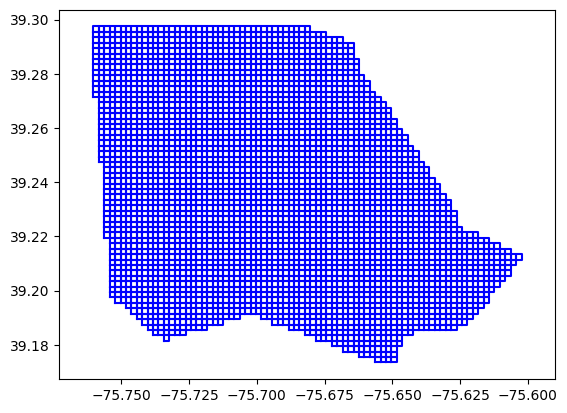

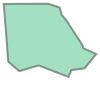

In [44]:
generate_grid_within_boundary(merged_data['geometry'][0])
merged_data['geometry'][0]

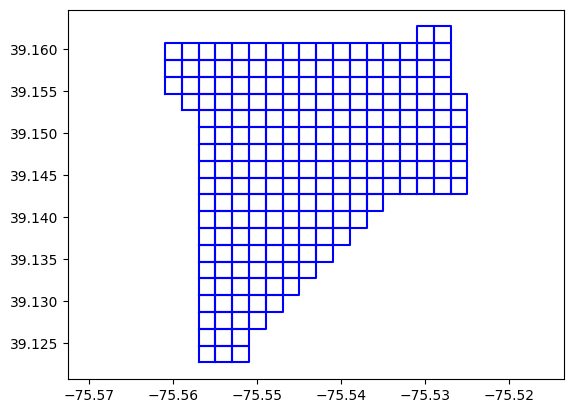

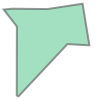

In [45]:
generate_grid_within_boundary(merged_data['geometry'][10])
merged_data['geometry'][10]